Dataset link --> https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Importing the necessary libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP Projects/Hugging Face/Spam Mail Prediction/mail_data.csv', encoding = 'latin-1')

In [ ]:
# first five rows of the dataset
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Number of rows & columns
print(df.shape)
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

(5572, 2)
Number of Rows 5572
Number of Columns 2


In [ ]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# checking for missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# first five messages
for i in range(5):
    print(df['Message'].iloc[i], "\n")

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

Ok lar... Joking wif u oni... 

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

U dun say so early hor... U c already then say... 

Nah I don't think he goes to usf, he lives around here though 



## Text Preprocessing

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocessing(content):
    content = re.sub('[^a-zA-Z]',' ',content)
    content = content.lower()
    content = content.split()
    content = [lemmatizer.lemmatize(word) for word in content if not word in stopwords.words('english')]
    content = ' '.join(content)
    return content

In [ ]:
df['Message'] = df['Message'].apply(preprocessing)

In [ ]:
# first five messages after applying preprocessing
for i in range(5):
    print(df['Message'].iloc[i], "\n")

go jurong point crazy available bugis n great world la e buffet cine got amore wat 

ok lar joking wif u oni 

free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply 

u dun say early hor u c already say 

nah think go usf life around though 



## Target Column

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
df['Category'] = df['Category'].map({'spam':0, 'ham':1})
df.head()

,Category,Message
0,1,go jurong point crazy available bugis n great ...
1,1,ok lar joking wif u oni
2,0,free entry wkly comp win fa cup final tkts st ...
3,1,u dun say early hor u c already say
4,1,nah think go usf life around though


## Visualization

In [ ]:
from wordcloud import WordCloud

In [ ]:
spam = df[df['Category']==0]

ham = df[df['Category']==1]

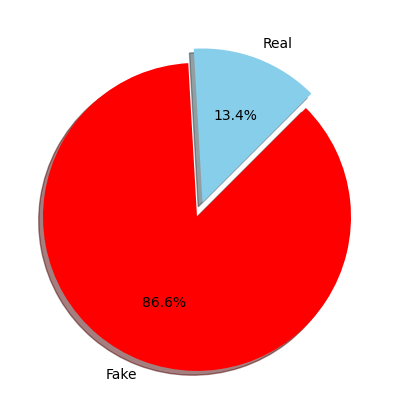

In [ ]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'red']
ck=[spam['Category'].count(),ham['Category'].count()]
legpie=plt.pie(ck,labels=["Real","Fake"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [ ]:
spam_msg = spam['Message']

ham_msg= ham['Message']

In [ ]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=stopwords.words('english'),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Spam messages are as follows


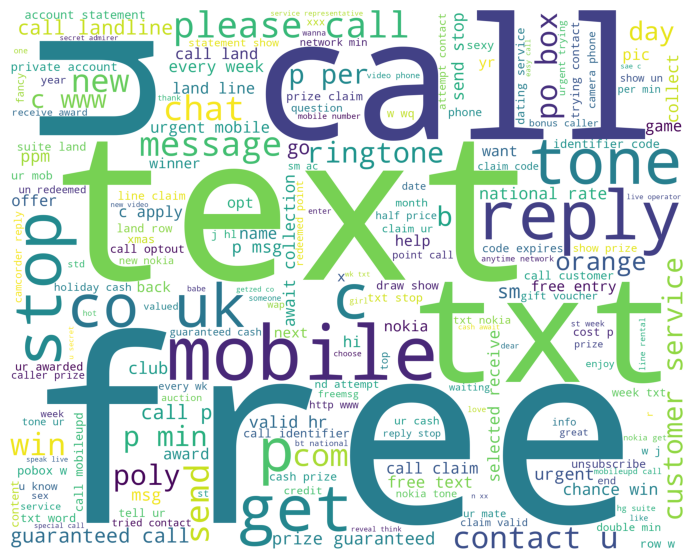

In [ ]:
print("Spam messages are as follows")
wordcloud_draw(spam_msg)

Ham messages are as follows


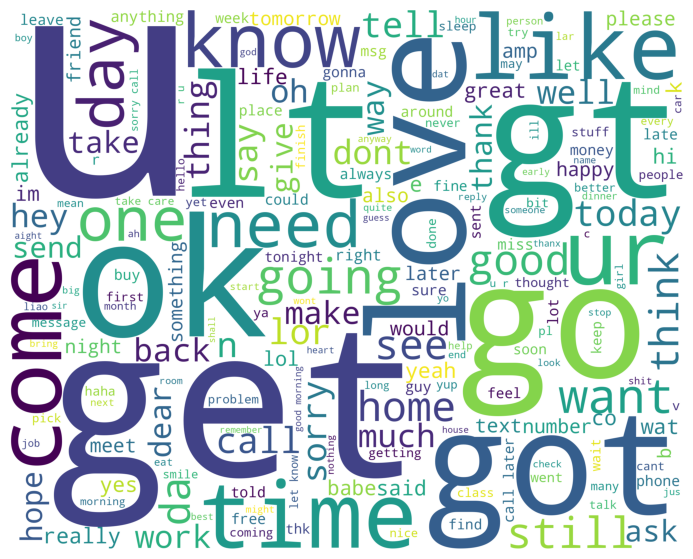

In [ ]:
print("Ham messages are as follows")
wordcloud_draw(ham_msg)

## Splitting the data & label

In [ ]:
X=list(df['Message'])


Y=list(df['Category'])

## Splitting into training & testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1, stratify = Y)

In [ ]:
print(len(X), len(x_train), len(x_test))

print(len(Y), len(y_train), len(y_test))

5572 4457 1115
5572 4457 1115


In [ ]:
# Installing the transformers
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.1 MB/s eta 0:00:00


In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
train_encodings = tokenizer(x_train, truncation=True, padding=True)

test_encodings = tokenizer(x_test, truncation=True, padding=True)

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_steps = 10
)

In [ ]:
with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset             # evaluation dataset
)

trainer.train()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
# loss
trainer.evaluate(test_dataset)

{'eval_loss': 0.04651553971426828}

In [ ]:
# predict for test data
trainer.predict(test_dataset)

PredictionOutput(predictions=array([[-3.0113513,  3.0441716],
       [-3.23292  ,  3.2628374],
       [-3.098785 ,  3.1634176],
       ...,
       [-3.2724335,  3.3361228],
       [-2.915679 ,  2.9193375],
       [-3.317076 ,  3.312064 ]], dtype=float32), label_ids=array([1, 1, 1, ..., 1, 1, 1], dtype=int32), metrics={'eval_loss': 0.046514572416033066})

In [ ]:
trainer.predict(test_dataset)[1]

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
trainer.predict(test_dataset)[1].shape

(1115,)

In [ ]:
output=trainer.predict(test_dataset)[1]

In [ ]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm=confusion_matrix(y_test, output)
cm

array([[149,   0],
       [  0, 966]])

In [ ]:
print(classification_report(y_test, output))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       966

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115

